# Polynomial Regression

The goal of this notebook is to study the topic of Polynomial Regression on real-world data and to solve the problem using data science methodology.My name is Sina, I'm new to the data science field! and this notebook was built for my personal practice. 

---
We got three different datasets in the previous notebook [[Simple Linear Regression](https://github.com/siniorone/Machine-Learning/blob/main/Python/01-Simple%20Linear%20Regresion.ipynb)], and by merging them, we were able to generate the dataset we needed and apply a simple linear regression model to our data.
[[Go to the previous notebook for instructions on how to construct our dataset.](https://github.com/siniorone/Machine-Learning/blob/main/Python/01-Simple%20Linear%20Regresion.ipynb)]
Our dependent variable was the ``death toll``, and our dependent variable was the ```vaccination rate```.
When we apply the model to data from **Italy**, we get the **R2-score: 0.78**.
It appeared that the model was relatively adequate until we applied it to data again from **Portugal** country and found that it lacked the required accuracy;
We have saved the data prepared in the previous notebook under the name of ```covid_vaccination_vs_death_ratio‍‍‍‍‍‍.csv```, and now we are reading it through a file. 

### we will now continue the story. 
First, let's have a look at the current state of our model using data from Portugal. 

In [1]:
# Import Skcit-Learn methods we want to use in this notebook
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
# Import useful Libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# Read the data set we need using Pandas from csv file 
df=pd.read_csv("./dataset/covid_vaccination_vs_death_ratio.csv")

Coefficients: -1.1422133580564595
Intercept: 78.73515370381895


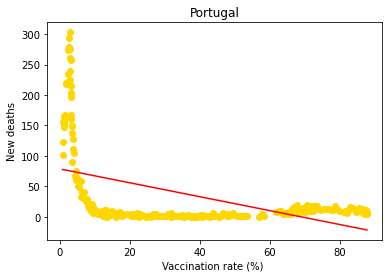

Mean absolute error: 44.99
Residual sum of squares (MSE): 3593.70
R2-score: 0.24


In [3]:
# We put the data from Portugal in the mydf variable .
mydf = df[df.country == "Portugal"]
# Create an object to build a linear regression model from Scikit-Learn Library. 
regr = linear_model.LinearRegression()
# We define training variables via Numpy in arrays .
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
# Using fit(x, y) method of Scikit-Learn object, we fit the model on the training variables.
regr.fit (train_x, train_y)
# The coefficients and Intercept of this Simple Linear Regression
print(f'Coefficients: {regr.coef_[0][0]}')
print(f'Intercept: {regr.intercept_[0]}')
# Now it is time to draw the line we want using Coefficients and Intercept. 
plt.scatter(mydf.ratio, mydf.New_deaths,  color='gold') 
XX = train_x
YY = regr.intercept_[0] + regr.coef_[0][0]*train_x   # y = Intercept + (Coeff * VaccinationRate)
# Plotting Regression Line
plt.plot(XX, YY, color='red')
plt.title("Portugal")
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()
# Calculate Predicted values by this model
test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
predict_y = regr.predict(train_x)
# Using Predicted values to mesure Error of this model
# Mean absolute error
MAE = np.mean(np.absolute(predict_y  - test_y))  
print(f"Mean absolute error: {MAE:.2f}")
# Mean squared error
MSE =  np.mean((predict_y  - test_y) ** 2)
print(f"Residual sum of squares (MSE): {MSE:.2f}")
# R2-score
r2 = r2_score(test_y , predict_y)
print(f"R2-score: {r2:.2f}")

As we can see, our linear model has an **R2-score** of **0.24**, which is close to zero, indicating that it is not a **good model**. Based on the shape of the plot, it appears that this plot is curved, therefore Polynomial regression may be preferable.But before we start let's see what is the **Polynomial regression**:

### ```Wikipedia:```
In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an **nth degree polynomial in x**.
The goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable (or vector of independent variables) x. In **simple linear regression**, the model 

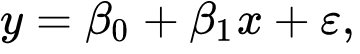

is used, where ε is an unobserved random error with mean zero conditioned on a scalar variable x. In this model, for each unit increase in the value of x, the conditional expectation of y increases by β1 units. 

In general, we can model the expected value of **y** as an **nth degree polynomial**, yielding the general polynomial regression model 

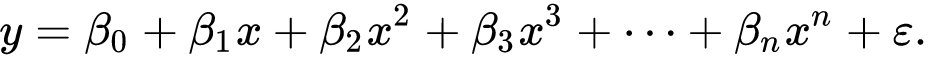

Conveniently, these models are all linear from the point of view of estimation, since the regression function is linear in terms of the unknown parameters β0, β1, .... Therefore, for least squares analysis, the computational and inferential problems of polynomial regression can be completely addressed using the techniques of *multiple regression*. This is done by treating **x, x2, ...** as being **distinct independent variables** in a multiple regression model.

The polynomial regression model can be expressed in matrix form in terms of a design matrix X , a response vector y a parameter vector β , and a vector ε  of random errors. The i-th row of X  and  y will contain the x and y value for the i-th data sample. Then the model can be written as a system of linear equations:    Then the model can be written as a system of linear equations:

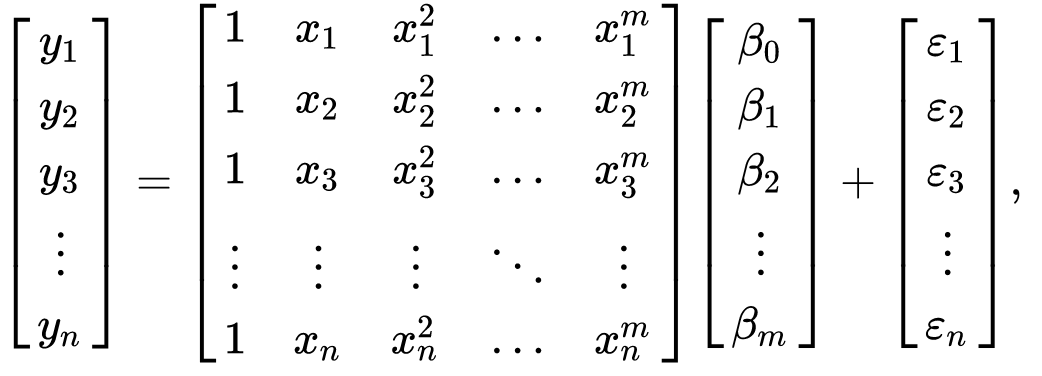

#### Let's build a polynomial regression model now. We define the **```plot_vaccine_mortality()```** function, which has three variables: ```country_name```, ```dataframe```, and ```degree```. 

In [4]:
def plot_vaccine_mortality(country_name, df, degree=2):
    """
    This function receives the dataset and the name of the country and dgree then divides
    data into two parts the [test] and [train]. And a polynomial regression model applies to 
    training data.Then evaluate the model using test data and prints the results. 
    how to use:
    >>> plot_vaccine_mortality("Italy", df, 8)
    """
    #---------------------------
    print(f"{country_name:-^80}")
    # Store country data in a variable 
    mydf = df[df.country == country_name]
    # Divide data randomly into two test and training sections 
    msk = np.random.rand(len(mydf)) < .8
    train = mydf[msk]
    test = mydf[~msk]
    # Identify the dependent(y) and independent variables(x) in the train dataframe
    train_x = np.asanyarray(train[['ratio']])
    train_y = np.asanyarray(train[['New_deaths']])
    # Identify the dependent(y) and non-dependent(x) variables in the test dataframe
    test_x = np.asanyarray(train[['ratio']])
    test_y = np.asanyarray(train[['New_deaths']])
    # Generate polynomial and interaction features Object with our desired degree  
    poly = PolynomialFeatures(degree=degree)
    # In this section, we make a number of variables with different degrees from 
    # independent variables(x) to use them in a multiple regression model.
    train_x_poly = poly.fit_transform(train_x)
    # Make the model 
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)
    # Print The coefficients
    print ('Coefficients: ')
    for i, c in enumerate(clf.coef_[0]):
        if i: print(f"{c:->22.10f} * X^{i}")
    # Print The Intercept    
    print ('Intercept: ',clf.intercept_[0])
    # Constructing a scatterplot using train data with random color
    plt.scatter(train.ratio, train.New_deaths,  color= np.random.rand(3,))
    # Set the X axis using numpy:   np.arange(start, end, interval)
    XX = np.arange(train_x[0], train_x[-1], 0.1)
    # Set the Y axis using intercept and coefficients that we found in previous steps
    YY = clf.intercept_[0] 
    for d in range(1,degree+1):
        YY += clf.coef_[0][d]*np.power(XX, d)
    # On the previous scatterplot, we fit the regression model with red color. 
    plt.plot(XX, YY, '-r' )
    plt.title(country_name)
    plt.xlabel("Vaccination rate (%) ")
    plt.ylabel("New deaths")
    plt.show()
    # Now it's time to evaluate the model we build 
    # Calculate Predicted values by this model
    test_x_poly = poly.fit_transform(test_x)
    predict_y = clf.predict(test_x_poly)
    # Using Predicted values to mesure Error of this model
    # Mean absolute error
    MAE = np.mean(np.absolute(predict_y - test_y))  
    print(f"Mean absolute error: {MAE:.2f}")
    # Mean squared error
    MSE =  np.mean((predict_y - test_y) ** 2)
    print(f"Residual sum of squares (MSE): {MSE:.2f}")
    # R2-score
    r2 = r2_score(test_y, predict_y)
    print(f"R2-score: {r2:.2f}")
    #---------------------------
    print("-"*80)

Now we return to Portugal's country's data and try to apply a polynomial regression model with degree of 2. 

------------------------------------Portugal------------------------------------
Coefficients: 
----------5.9853994497 * X^1
----------0.0557471905 * X^2
Intercept:  134.5582723220129


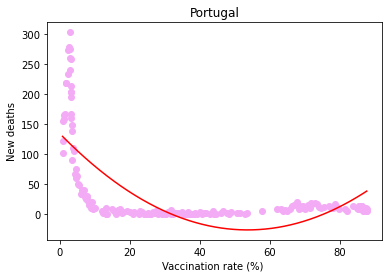

Mean absolute error: 36.95
Residual sum of squares (MSE): 2447.36
R2-score: 0.51
--------------------------------------------------------------------------------


In [5]:
plot_vaccine_mortality("Portugal", df, 2)

Despite the fact that R2-score has improved(**0.24** --> **0.5**), it can still be improved. Therefore, we increase the degree of regression to create a model with the least error. (Note that because the data is randomly divided into test and train part, their value may be slightly different in different runs.) 

|| 1 | 2 | 3 | 4 | 5 | **6** | 7 | 8 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| **R2-Score** | 0.26 | 0.48 | 0.66 | 0.75 | 0.80| **0.83** | 0.80 | 0.80 | 

We find that the polynomial regression of Portugal data generates the least amount of error in the **sixth degree**

Let's plot it. 

------------------------------------Portugal------------------------------------
Coefficients: 
---------51.7735049442 * X^1
----------3.4716240961 * X^2
----------0.1116104347 * X^3
----------0.0018503796 * X^4
----------0.0000152240 * X^5
----------0.0000000492 * X^6
Intercept:  283.63779556955456


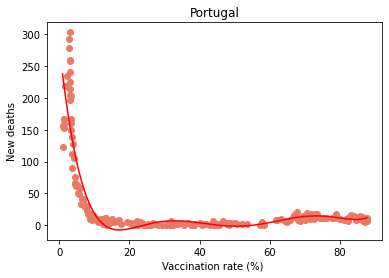

Mean absolute error: 15.24
Residual sum of squares (MSE): 869.24
R2-score: 0.82
--------------------------------------------------------------------------------


In [6]:
plot_vaccine_mortality("Portugal", df, 6)

Now let's plot several other countries with the appropriate degree: 


-------------------------------------Spain--------------------------------------
Coefficients: 
--------202.1166285926 * X^1
---------20.3438006544 * X^2
----------1.0193886678 * X^3
----------0.0279450314 * X^4
----------0.0004275838 * X^5
----------0.0000034299 * X^6
----------0.0000000112 * X^7
Intercept:  833.9414312993563


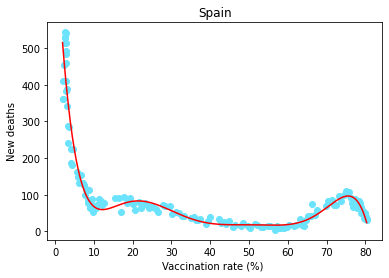

Mean absolute error: 19.35
Residual sum of squares (MSE): 1218.80
R2-score: 0.93
--------------------------------------------------------------------------------


In [7]:
plot_vaccine_mortality("Spain", df, 7)

----------------------------------Switzerland-----------------------------------
Coefficients: 
---------20.7775507423 * X^1
----------2.5582744853 * X^2
----------0.1604486918 * X^3
----------0.0055844165 * X^4
----------0.0001093344 * X^5
----------0.0000011252 * X^6
----------0.0000000047 * X^7
Intercept:  74.24019428412485


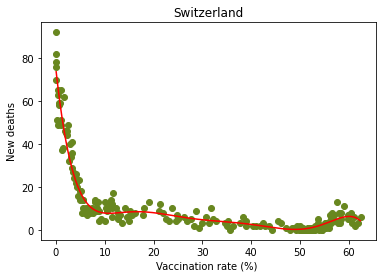

Mean absolute error: 2.68
Residual sum of squares (MSE): 17.50
R2-score: 0.95
--------------------------------------------------------------------------------


In [8]:
plot_vaccine_mortality("Switzerland", df, 7)

------------------------------------Austria-------------------------------------
Coefficients: 
---------24.1622403210 * X^1
----------3.4514995283 * X^2
----------0.2210630880 * X^3
----------0.0072980810 * X^4
----------0.0001299877 * X^5
----------0.0000011865 * X^6
----------0.0000000043 * X^7
Intercept:  78.30244704497079


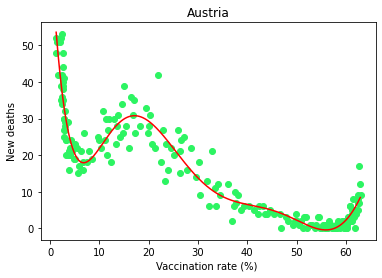

Mean absolute error: 2.78
Residual sum of squares (MSE): 16.22
R2-score: 0.92
--------------------------------------------------------------------------------


In [9]:
plot_vaccine_mortality("Austria", df, 7)

-------------------------------The United Kingdom-------------------------------
Coefficients: 
--------392.1446968172 * X^1
---------37.8286242749 * X^2
----------1.4878075004 * X^3
----------0.0292446286 * X^4
----------0.0002843493 * X^5
----------0.0000010878 * X^6
Intercept:  -71.38623524382209


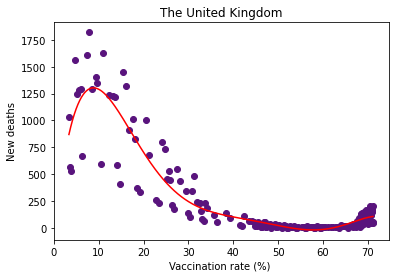

Mean absolute error: 75.73
Residual sum of squares (MSE): 21451.10
R2-score: 0.86
--------------------------------------------------------------------------------


In [10]:
plot_vaccine_mortality("The United Kingdom", df, 6)

----------------------------United States of America----------------------------
Coefficients: 
--------101.9524109239 * X^1
---------29.7504424019 * X^2
----------1.4083483629 * X^3
----------0.0256356521 * X^4
----------0.0001570729 * X^5
----------0.0000000940 * X^6
Intercept:  3337.5026344104217


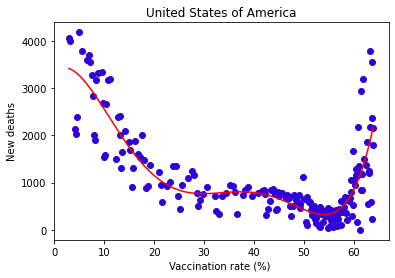

Mean absolute error: 308.82
Residual sum of squares (MSE): 229948.09
R2-score: 0.75
--------------------------------------------------------------------------------


In [11]:
plot_vaccine_mortality("United States of America", df, 6)

---
Thank you so much for taking the time to read this notebook.
Please leave a comment if you wish. 
You can also use this function with the list of countries attached and draw and plot your own country data. 

To be continued! 

# Appendix:
### Name of countries that you can use in this function. 

||||||
| --- | --- | --- | --- | --- |
| Afghanistan | Albania | Algeria | Andorra | Angola |
| Anguilla | Antigua and Barbuda | Argentina | Armenia | Aruba |
| Australia | Austria | Azerbaijan | Bahamas | Bahrain |
| Bangladesh | Barbados | Belarus | Belgium | Belize |
| Benin | Bermuda | Bhutan | Bolivia (Plurinational State of) | Brazil |
| Bosnia and Herzegovina | Botswana | Brunei Darussalam | Bulgaria | Burkina Faso |
| Cambodia | Cameroon | Canada | Cabo Verde | Cayman Islands |
| Central African Republic | Chad | Chile | China | Colombia |
| Comoros | Cook Islands | Costa Rica | Croatia | Cuba |
| Curaçao | Cyprus | Denmark | Djibouti | Dominica |
| Dominican Republic | Ecuador | Egypt | El Salvador | Equatorial Guinea |
| Estonia | Ethiopia | Falkland Islands (Malvinas) | Fiji | Finland | 
| France | French Polynesia | Gabon | Gambia | Georgia | 
| Germany | Ghana | Gibraltar | Greece | Greenland |
| Grenada | Guatemala | Guinea | Guinea-Bissau | Guyana | 
| Haiti | Honduras | Hungary | Iceland | India |
| Indonesia | Iran (Islamic Republic of) | Iraq | Ireland | Isle of Man |
| Israel | Italy | Jamaica | Japan | Jordan |
| Kazakhstan | Kenya | Kiribati | Kuwait | Kyrgyzstan |
| Lao People's Democratic Republic | Latvia | Lebanon | Lesotho | Liberia |
| Libya | Liechtenstein | Lithuania | Luxembourg | Madagascar |
| Malawi | Malaysia | Maldives | Mali | Malta |
| Mauritania | Mauritius | Mexico | Republic of Moldova | Monaco |
| Mongolia | Montenegro | Montserrat | Morocco | Mozambique |
| Myanmar | Namibia | Nauru | Nepal | Netherlands |
| New Caledonia | New Zealand | Nicaragua | Niger | Nigeria |
| Niue | North Macedonia | Norway | Oman | Pakistan |
| occupied Palestinian territory, including east Jerusalem |||||
| Panama | Papua New Guinea | Paraguay | Peru | Philippines |
| Poland | Portugal | Qatar | Romania | Russian Federation |
| Rwanda | Saint Kitts and Nevis | Saint Lucia |
| Saint Vincent and the Grenadines | Samoa | San Marino | Sao Tome and Principe | Saudi Arabia |
| Senegal | Serbia | Seychelles | Sierra Leone | Singapore |
| Slovakia | Slovenia | Solomon Islands | Somalia | South Africa |
| Republic of Korea | South Sudan | Spain | Sri Lanka | Sudan |
| Suriname | Sweden | Switzerland | Syrian Arab Republic | Tajikistan |
| United Republic of Tanzania | Thailand | Togo | Tonga | Trinidad and Tobago |
| Tunisia | Turkey | Turkmenistan | Turks and Caicos Islands | Tuvalu |
| Uganda | Ukraine | United Arab Emirates | The United Kingdom | United States of America |
| Uruguay | Uzbekistan | Vanuatu | Venezuela (Bolivarian Republic of) | Viet Nam |
| Wallis and Futuna | Yemen | Zambia | Zimbabwe ||

## Author

Sina Karaji ( [Linkdin](https://ir.linkedin.com/in/sina-karaji-81829279) | [Github](https://github.com/siniorone))


## Change Log

| Date (YYYY-MM-DD) |  Changed By    | Change Description                 |
| ----------------- |  ------------- | ---------------------------------- |
| 2021-10-06        |  Sina Karaji | Created and uploaded            |